<a href="https://colab.research.google.com/github/alanprawira/AI-comparation/blob/main/comparing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [107]:
#Load the dataset
data   = pd.read_csv("/content/weather.csv")

data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [108]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [109]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [111]:
#Check for null values
data.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [112]:
#convert the data type into datetime
data['date'] = pd.to_datetime(data['date'])

In [113]:
data.nunique()

,0
date,1461
precipitation,111
temp_max,67
temp_min,55
wind,79
weather,5


<ipython-input-114-758220560>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")


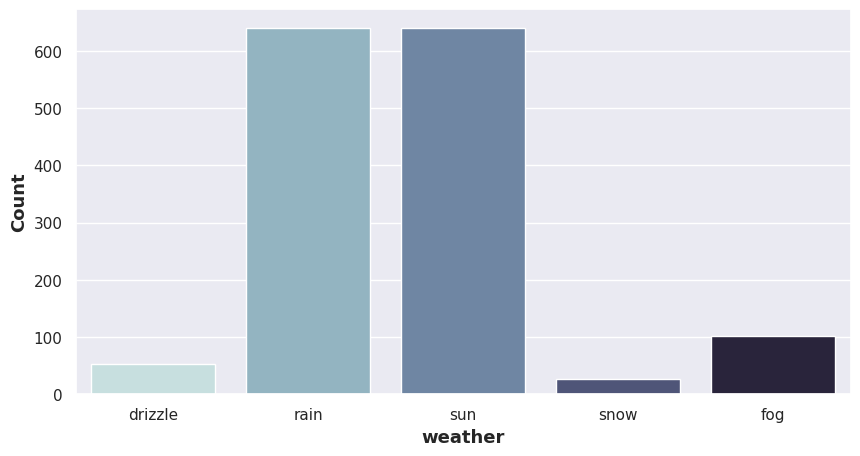

In [114]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

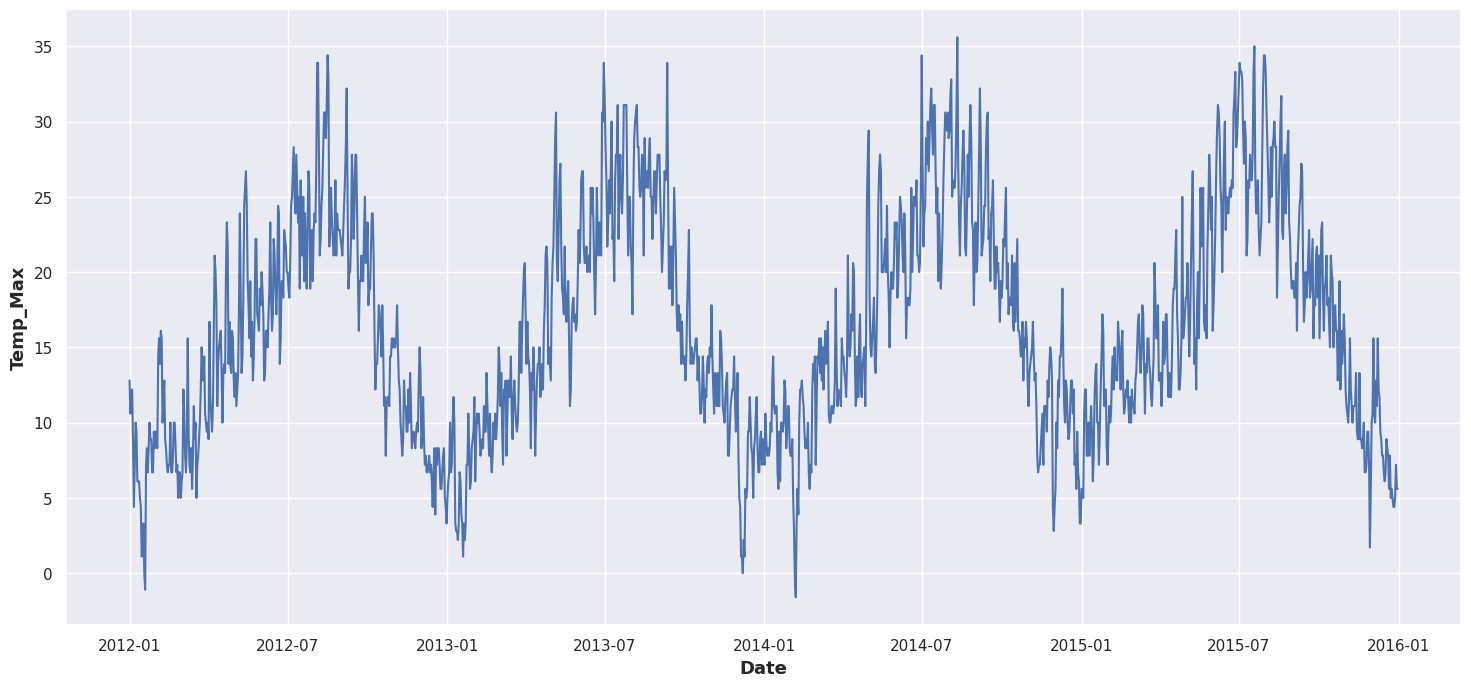

In [115]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

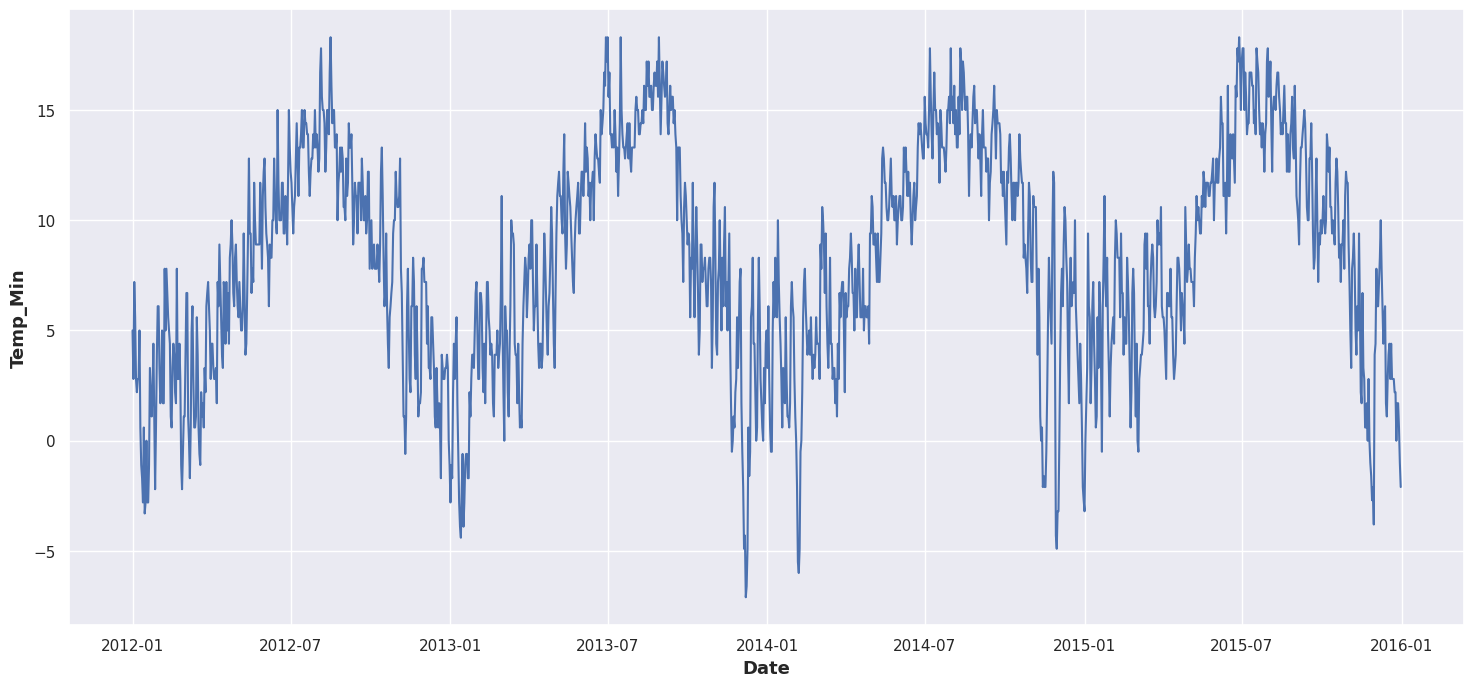

In [116]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.show()

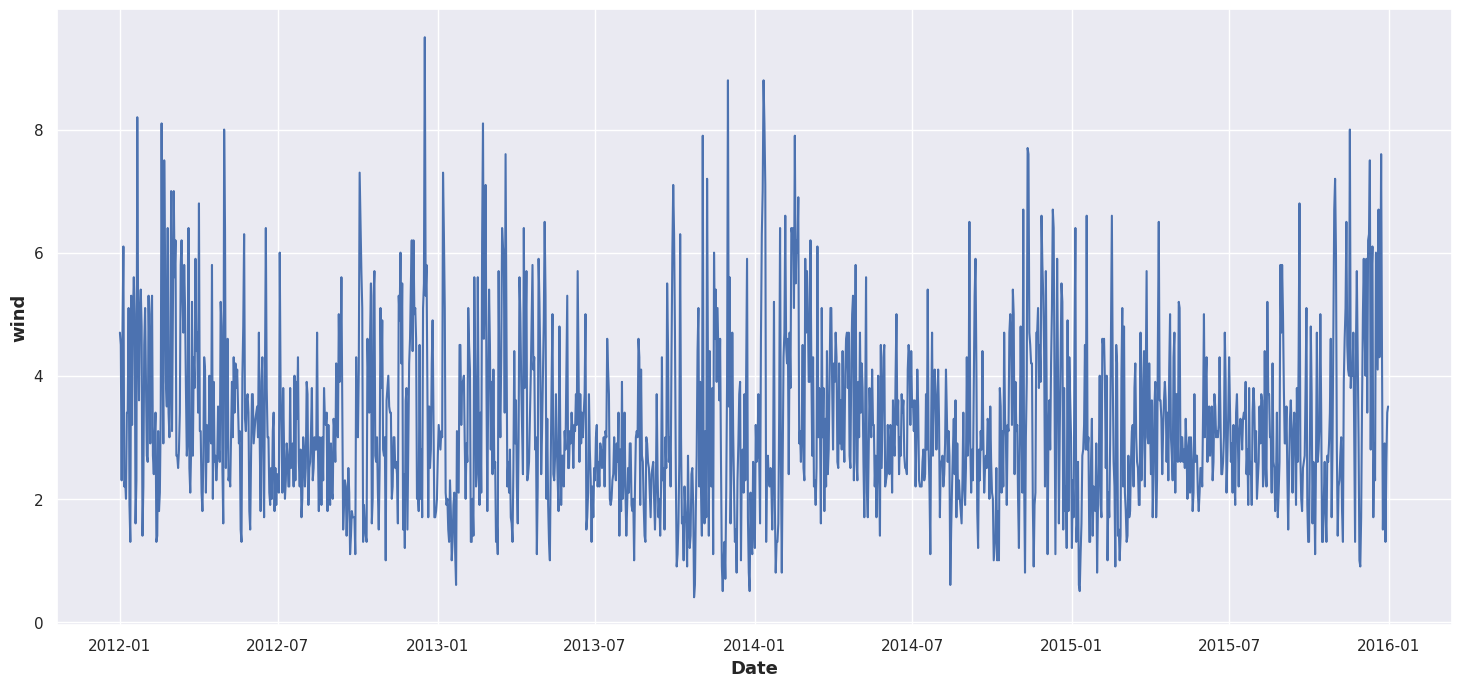

In [117]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.show()

<Figure size 1400x800 with 0 Axes>

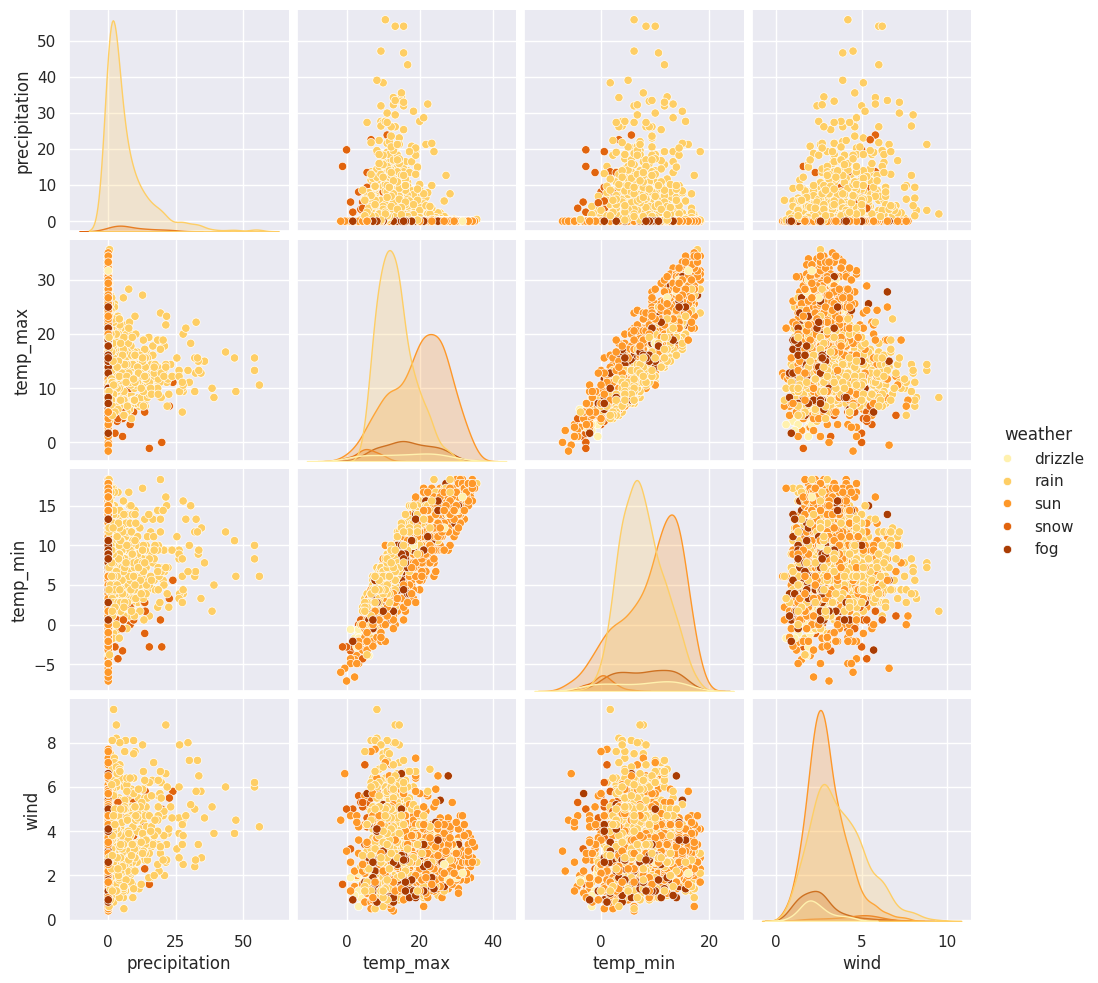

In [118]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()

<ipython-input-119-3814060822>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")


<Figure size 1000x500 with 0 Axes>

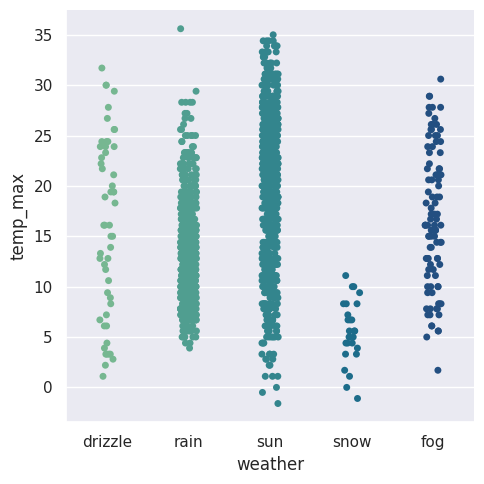

In [119]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")
plt.show()

<ipython-input-120-1093999663>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")


<Figure size 1000x500 with 0 Axes>

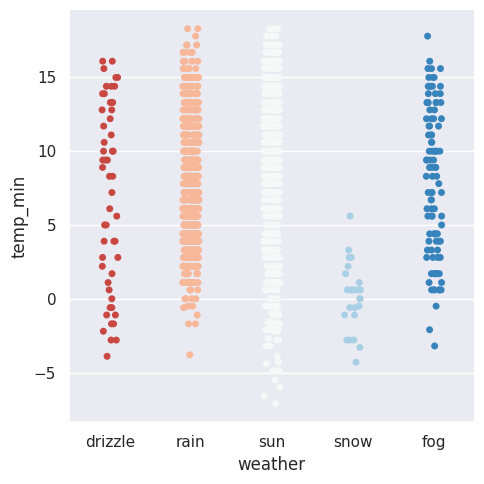

In [120]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")
plt.show()

<ipython-input-121-1991129908>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='wind',data=data,palette = "magma")


<Figure size 1000x500 with 0 Axes>

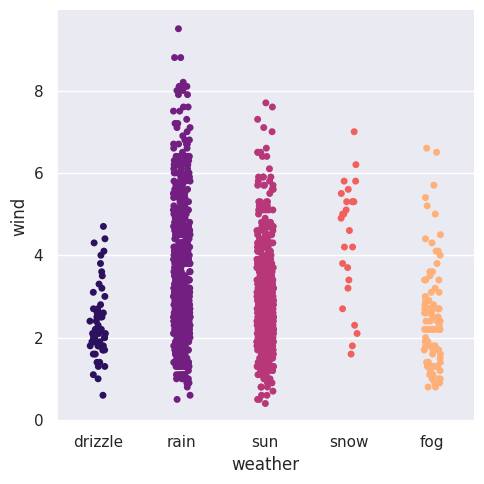

In [121]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=data,palette = "magma")
plt.show()

<ipython-input-122-1492132081>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='precipitation',data=data,palette = "viridis")


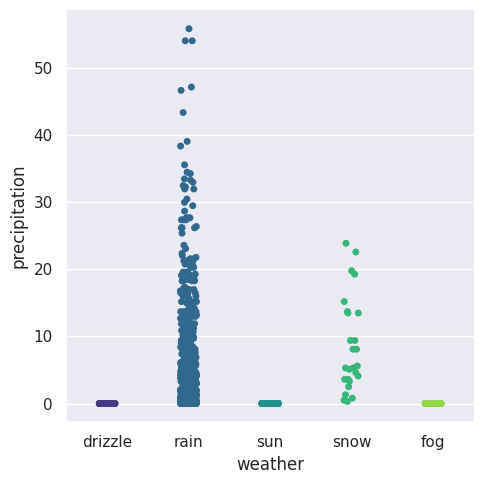

In [122]:
sns.catplot(x='weather',y ='precipitation',data=data,palette = "viridis")
plt.show()

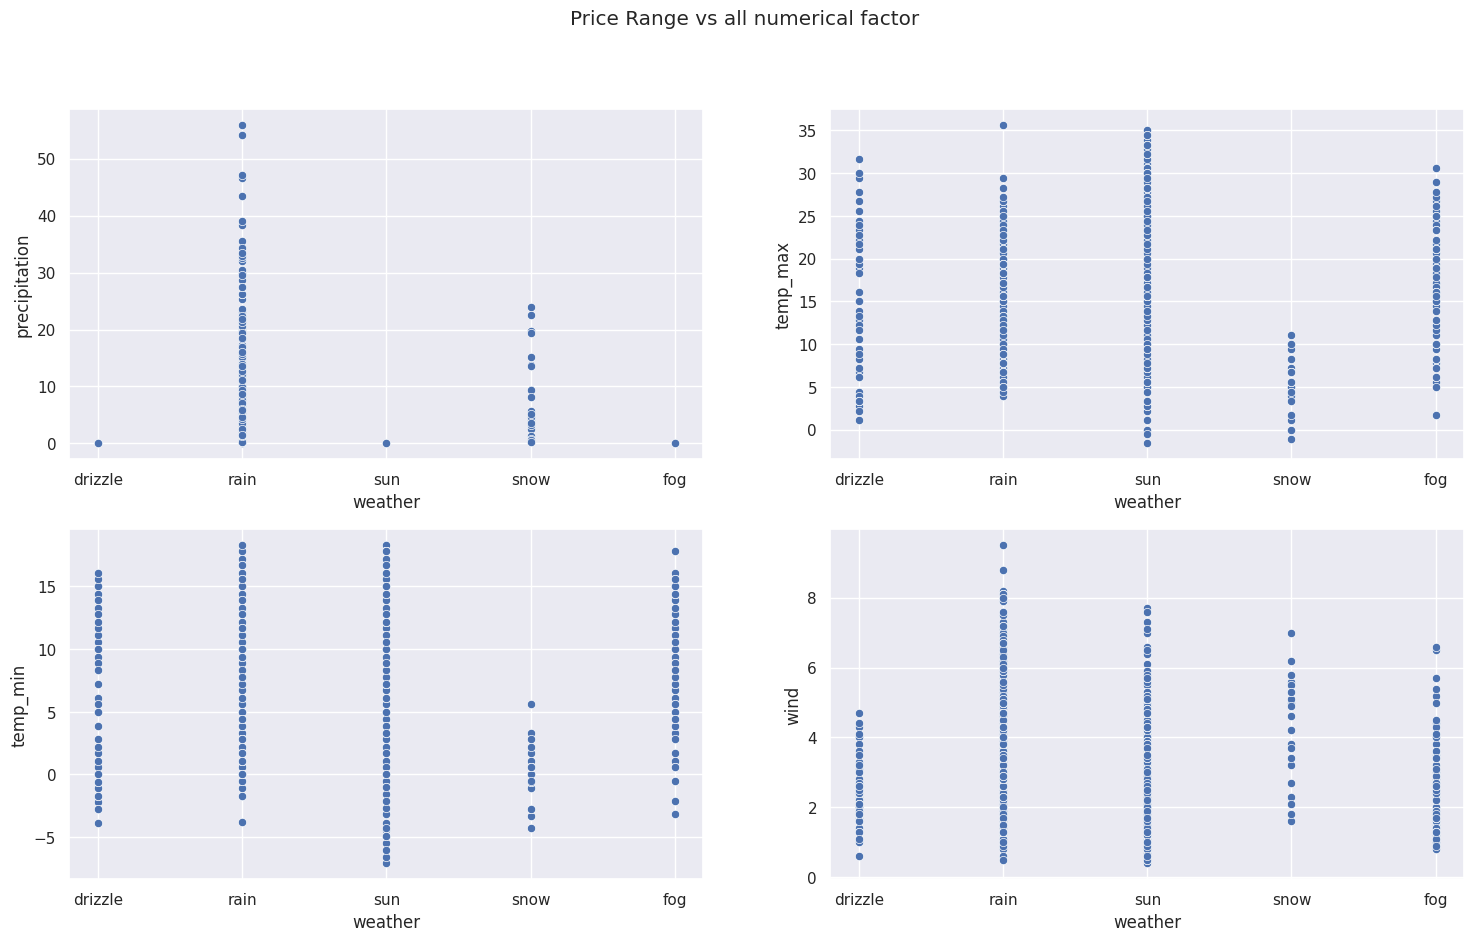

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.scatterplot(ax=axes[0, 0], data=data, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=data, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=data, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=data, x='weather', y='wind')
plt.show()

In [124]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [125]:
data = data.drop('date',axis=1)

In [126]:
x = data.drop('weather',axis=1)
y = data['weather']

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [128]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**LOGISTIC REGRESSION**

In [130]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [131]:
y_pred = classifier.predict(X_test)

In [132]:
y_pred

array([4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   3   0  28]
 [  0   0 130   0  25]
 [  0   0   6   0   0]
 [  0   0  14   0 149]]


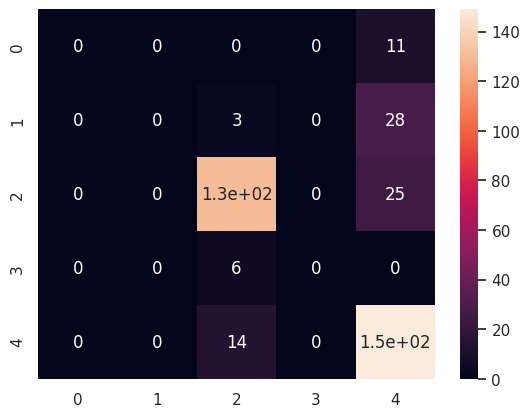

In [134]:
sns.heatmap(cm,annot=True)
plt.show()

In [135]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.7622950819672131


In [189]:
# Calculate and print classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8156996587030717
Precision: 0.7784569684657945
Recall: 0.8156996587030717
F1-score: 0.7835099772474666


**SVC**

In [136]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [137]:
y_pred = classifier.predict(X_test)

In [138]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 126   0  29]
 [  0   0   4   2   0]
 [  0   0   0   0 163]]


In [139]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.7950819672131147


In [185]:
# Calculate and print classification metrics for SVC
accuracy_svc = accuracy_score(y_test, y_pred)
precision_svc = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification
recall_svc = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification
f1_svc = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification

print(f"SVC Accuracy: {accuracy_svc}")
print(f"SVC Precision: {precision_svc}")
print(f"SVC Recall: {recall_svc}")
print(f"SVC F1-score: {f1_svc}")


SVC Accuracy: 0.8156996587030717
SVC Precision: 0.7784569684657945
SVC Recall: 0.8156996587030717
SVC F1-score: 0.7835099772474666


In [193]:
from sklearn.model_selection import train_test_split
# Assuming 'x' and 'y' from the earlier split (before the Random Forest section) are still in scope
# If not, you might need to re-define them here based on your processed data.
# From the notebook, it seems x and y were last defined as:
# x = data.drop('weather',axis=1)
# y = data['weather']
# Let's re-perform the split using the same parameters as before for consistency.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Re-apply StandardScaler to the newly split data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

print(f"Accuracy score: {acc2}")

# Calculate and print classification metrics for SVC
accuracy_svc = accuracy_score(y_test, y_pred)
precision_svc = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification
recall_svc = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification
f1_svc = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification

print(f"SVC Accuracy: {accuracy_svc}")
print(f"SVC Precision: {precision_svc}")
print(f"SVC Recall: {recall_svc}")
print(f"SVC F1-score: {f1_svc}")

[[  0   0   0   0  11]
 [  0   0   3   0  28]
 [  0   0 132   0  23]
 [  0   0   5   0   1]
 [  0   0  15   0 148]]
Accuracy score: 0.7650273224043715
SVC Accuracy: 0.7650273224043715
SVC Precision: 0.6730375780177661
SVC Recall: 0.7650273224043715
SVC F1-score: 0.7131293650097893


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**KNN**

In [140]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [141]:
y_pred = classifier.predict(X_test)

In [142]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   1   3   0   6]
 [  1   4   5   0  21]
 [  0   3 127   0  25]
 [  0   0   3   1   2]
 [  5  17  26   0 115]]


In [143]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.6775956284153005


In [144]:
# Calculate metrics for KNN (classification task)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN Precision: {precision:.4f}")
print(f"KNN Recall: {recall:.4f}")
print(f"KNN F1-score: {f1:.4f}")

KNN Accuracy: 0.6776
KNN Precision: 0.6652
KNN Recall: 0.6776
KNN F1-score: 0.6659


**Naive Bayes**

In [145]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [146]:
y_pred = classifier.predict(X_test)

In [147]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 141   2  12]
 [  0   0   2   4   0]
 [  0   0   0   0 163]]


In [148]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class
print(f"Precision: {precision}")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class
print(f"Recall: {recall}")
# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class
print(f"F1-score: {f1}")

Precision: 0.7630326662584728
Accuracy: 0.8415300546448088
Recall: 0.8415300546448088
F1-score: 0.7937559957766569


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Decision Tree Classification**

In [149]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [150]:
y_pred = classifier.predict(X_test)

y_pred

array([4, 0, 2, 4, 4, 2, 2, 2, 4, 2, 0, 2, 4, 1, 0, 4, 1, 2, 2, 2, 2, 2,
       2, 4, 4, 0, 4, 2, 0, 4, 2, 4, 3, 2, 2, 2, 0, 2, 0, 2, 4, 2, 2, 2,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 3, 4, 2, 4, 4, 4, 1, 1, 2,
       4, 1, 4, 2, 2, 3, 2, 0, 1, 4, 2, 0, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 4, 1, 2, 1, 2, 3, 4, 0, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 1, 2, 4, 4, 0, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 3, 4, 4, 4, 2, 2, 4, 4, 4, 4, 1, 4, 2,
       1, 2, 0, 4, 2, 4, 4, 0, 2, 1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 1, 2, 1, 4, 2, 2, 4, 4, 4, 1, 4, 2, 2, 4, 0,
       2, 4, 2, 2, 1, 4, 2, 2, 2, 4, 1, 1, 3, 2, 2, 2, 1, 4, 1, 2, 2, 2,
       1, 4, 4, 2, 4, 4, 2, 4, 2, 0, 0, 2, 2, 2, 2, 1, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 0, 2, 4, 0, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4,
       1, 2, 4, 2, 4, 1, 4, 4, 2, 2, 0, 1, 2, 4, 2, 4, 2, 2, 2, 0, 0, 4,
       2, 4, 2, 2, 1, 2, 4, 2, 1, 2, 2, 4, 2, 4, 2,

In [151]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   2   1   0   7]
 [  6   8   1   0  16]
 [  0   1 140   4  10]
 [  0   0   3   3   0]
 [ 18  23   9   0 113]]


<Axes: >

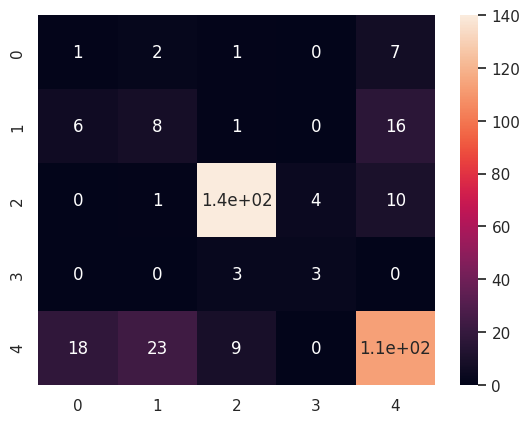

In [152]:
sns.heatmap(cm,annot=True)

In [153]:
# For Decision Tree Classification
print("Decision Tree Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Decision Tree Classification Metrics:
Accuracy: 0.7240
Precision: 0.7578
Recall: 0.7240
F1-score: 0.7396


**Random Forest Classifier**

In [156]:
x = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['weather']

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [158]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)


Random Forest Classifier Metrics:
Accuracy: 0.8157
Precision: 0.7785
Recall: 0.8157
F1-score: 0.7835

Confusion Matrix for Random Forest:
[[  1   0   0   0   8]
 [  1   2   2   0  20]
 [  0   0 110   3   7]
 [  0   0   6   2   0]
 [  3   3   1   0 124]]


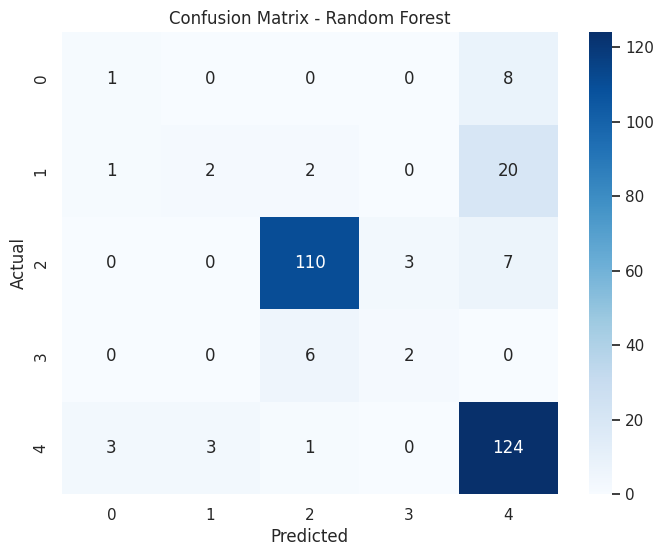

In [165]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
# Evaluate the Random Forest Classifier
print("\nRandom Forest Classifier Metrics:")

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.4f}")

# Calculate Precision
precision_rf = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Precision: {precision_rf:.4f}")

# Calculate Recall
recall_rf = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Recall: {recall_rf:.4f}")

# Calculate F1-score
f1_rf = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"F1-score: {f1_rf:.4f}")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix for Random Forest:")
print(cm_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

<ipython-input-194-4091921412>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


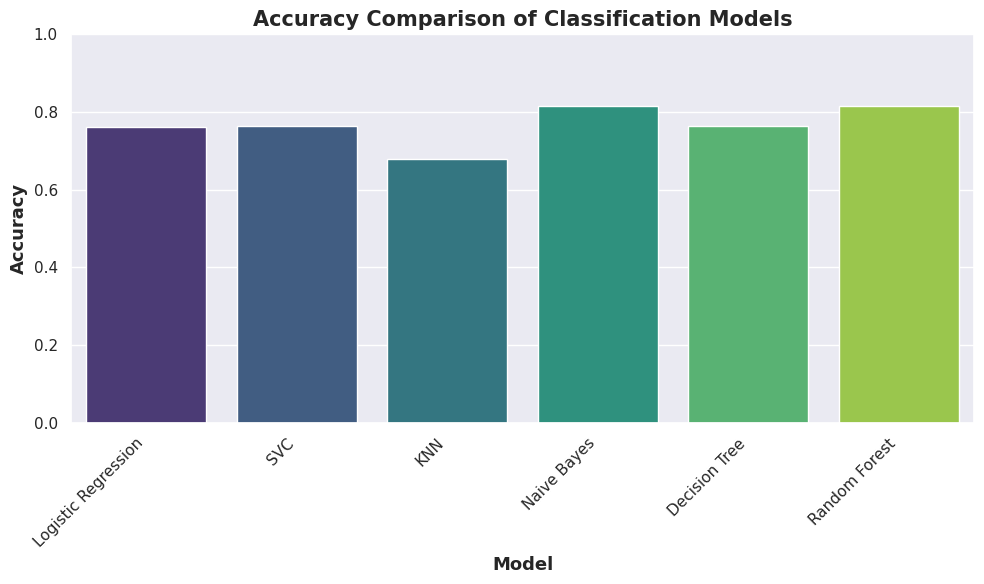

In [194]:
# Store the accuracies of each model
model_accuracies = {
    'Logistic Regression': acc1,
    'SVC': acc2,
    'KNN': acc3,
    'Naive Bayes': accuracy, # Using the 'accuracy' variable from Naive Bayes
    'Decision Tree': accuracy_score(y_test, y_pred), # Using the 'accuracy_score' calculation from Decision Tree
    'Random Forest': accuracy_rf
}

# Create a bar plot for model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.xlabel('Model', fontweight='bold', size=13)
plt.ylabel('Accuracy', fontweight='bold', size=13)
plt.title('Accuracy Comparison of Classification Models', fontweight='bold', size=15)
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()